In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./csvfiles/mldata/titanic_train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Survived 예측

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<BarContainer object of 12 artists>

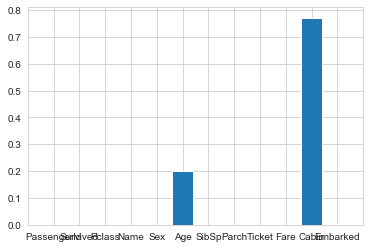

In [12]:
plt.bar(df.columns, height=df.isnull().sum()/len(df))

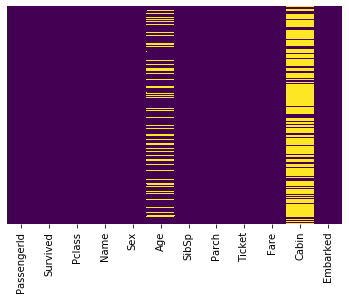

In [9]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

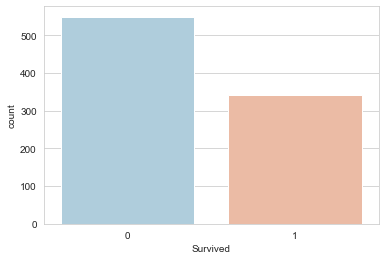

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette='RdBu_r')

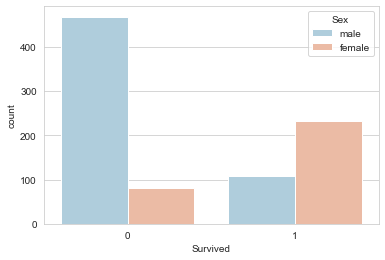

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r')

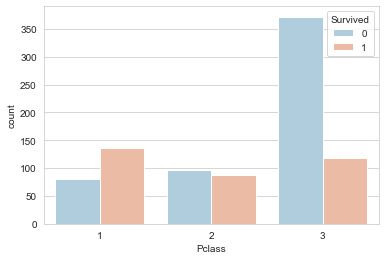

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=df, hue='Survived', palette='RdBu_r')

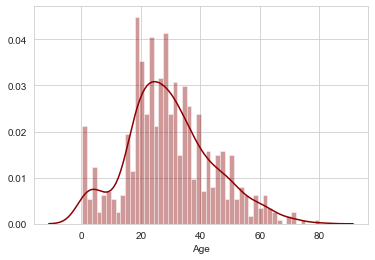

In [21]:
sns.distplot(df['Age'].dropna(), bins=50, color='darkred')

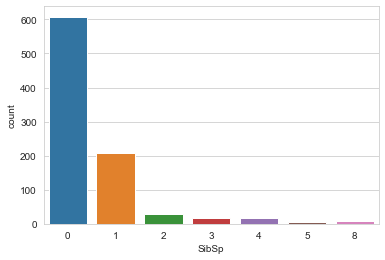

In [24]:
sns.countplot(x='SibSp', data=df) #동반자 수

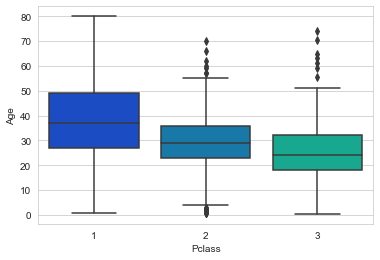

In [26]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter') # 클래스별 연령대

In [28]:
# cabin컬럼은 삭제
df.drop('Cabin', axis=1, inplace=True)

In [29]:
# age의 null값을 그 사람이 속한 pclass의 평균나이로 채우기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
age =[]
for i in zip(df['Pclass'],df['Age']):
    c = i[0]
    a = i[1]
    if str(a)=='nan':
        if c==1:
            age.append(38)
        elif c==2:
            age.append(29)
        elif c==3:
            age.append(25)
    else:
        age.append(a)

In [32]:
age

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 29,
 31.0,
 25,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25,
 19.0,
 25,
 25,
 40.0,
 38,
 25,
 66.0,
 28.0,
 42.0,
 25,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25,
 3.0,
 19.0,
 25,
 25,
 25,
 25,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 38,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 38,
 25,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25,
 25,
 0.83,
 30.0,
 22.0,
 29.0,
 25,
 28.0,
 17.0,
 33.0,
 16.0,
 25,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 25,
 38.0,
 25,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 25,
 32.5,
 32.5,
 54.0,
 12.0,
 25,
 24.0,
 25,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 25,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.

In [33]:
df['Age'] = age

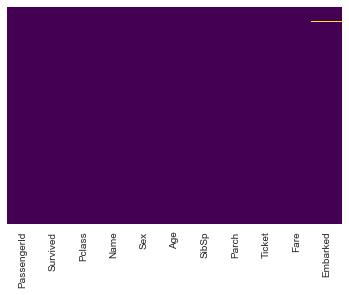

In [36]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [39]:
df.dropna(inplace=True)

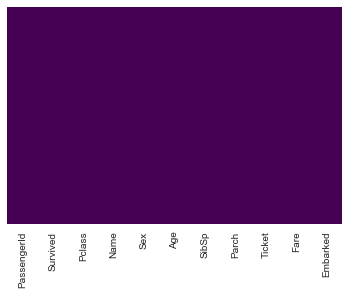

In [40]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [41]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
y = df['Survived']
x = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Sex']]

# .get_dummies()
## 문자데이터를 숫자데이터(범주)로 전환

In [53]:
pd.get_dummies(x).head()

,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0
2,3,26.0,0,0,0,0,1,1,0
3,1,35.0,1,0,0,0,1,1,0
4,3,35.0,0,0,0,0,1,0,1


In [54]:
# drop_first=True 컬럼의 수를 줄일 수 있다. 둘중하나가 0이면 나머지 하나는 1이므로
# 셋중 두개가 0이면 나머지 하나가 1이된다.
x = pd.get_dummies(x, drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,0,1,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,1,0
3,1,35.0,1,0,0,1,0
4,3,35.0,0,0,0,1,1


## 학습/테스트 데이터분리

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=77)

# LogisticRegression 알고리즘을 선택하고 객체생성, 학습,예측

In [58]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [59]:
log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
predictions = log.predict(x_test)
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [63]:
np.mean(y_test.values == predictions)

0.8370786516853933

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

### confusion_matrix의 결과
### [pp(정답을 정답), fp(오답을 정답)]
### [pf(정답을 오답), ff(오답을 오답)]

In [65]:
confusion_matrix(y_test, predictions)

array([[90,  7],
       [22, 59]], dtype=int64)

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.89      0.73      0.80        81

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.83       178
weighted avg       0.84      0.84      0.83       178



In [67]:
import pickle
filename = 'log_titanic_model.sav'
pickle.dump(log, open(filename, 'wb'))

In [68]:
saved_logmodel = pickle.load(open(filename, 'rb'))

In [69]:
saved_logmodel.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)